## Content
This data set contains statistics, in arrests per state
for crime againts person, crime against property, crime against law efforcement in each of the 36 Nigeria states in 2017.
Also given is the percent of the population living in urban areas.This is a systematic approach for identifying and analyzing patterns and trends in crime using NigeriaArrest dataset. 

## What is Hierarchical Clustering?

Hierarchical clustering is a type of unsupervised machine learning algorithm used to cluster unlabeled data points. Like K-means clustering, hierarchical clustering also groups together the data points with similar characteristics.One of the major considerations in using the K-means algorithm is deciding the value of K beforehand. The hierarchical clustering algorithm does not have this restriction.The output of the hierarchical clustering algorithm is quite different from the K-mean algorithm as well. It results in an inverted tree-shaped structure, called the **dendrogram**.

## Types Of Hierarchical Clustering:

There are two types of hierarchical clustering: 

* **Agglomerative**: The data points are clustered using a bottom-up approach starting with individual data points.
* **Divisive**: The top-down approach is followed where all the data points are treated as one big cluster and the clustering process involves dividing the one big cluster into several small clusters.

## Steps to Perform Hierarchical Clustering:

Following are the steps involved in **agglomerative clustering**:

* At the start, treat each data point as one cluster. Therefore, the number of clusters at the start will be K, while K is an integer representing the number of data points.
* Form a cluster by joining the two closest data points resulting in K-1 clusters.
* Form more clusters by joining the two closest clusters resulting in K-2 clusters.
* Repeat the above three steps until one big cluster is formed.
* Once single cluster is formed, dendrograms are used to divide into multiple clusters depending upon the problem. We will study the concept of dendrogram in detail in an upcoming section.

## Import the Desired Libraries:

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

## Reading and Understanding the Data

In [3]:
df_crime = pd.read_csv("../input/newcrimedata/crime data nigeria 2017.csv")

In [4]:
#peeking at the dataset

df_crime.head(5)

,STATE,MURDER,MAN SLAUGHTER,ATTEMPTED SUICIDE,ASSAULT,CHILD STEALING,RAPE & INDICENT ASSAULT,KIDNAPPING,OFFENCES AGAINST PERSONS
0,ABUJA,91,3,15.076923,217.000000,3.000000,132.000000,49.000000,1183
1,AKWA IBOM,81,5,15.076923,341.000000,52.000000,83.000000,11.000000,702
2,ANAMBRA,41,8,15.076923,706.617647,18.157895,61.594595,30.648649,127
3,ABIA,97,6,15.076923,8945.000000,68.000000,98.000000,104.000000,9816
4,ADAMAWA,114,8,15.076923,68.000000,18.157895,24.000000,9.000000,811


### Our dataset consists of crime rates for Murder, Assault, Man Slaughter, Rape, offence against a person and child stealing etc 

In [5]:
# Let's see how many rows and columns we got!

df_crime.shape

(38, 9)

In [6]:
df_crime.columns

Index(['STATE', 'MURDER', 'MAN SLAUGHTER', 'ATTEMPTED SUICIDE', 'ASSAULT',
       'CHILD STEALING', 'RAPE & INDICENT ASSAULT', 'KIDNAPPING',
       'OFFENCES AGAINST PERSONS'],
      dtype='object')

In [7]:
#Let's see some facts about the data
df_crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   STATE                     38 non-null     object 
 1   MURDER                    38 non-null     int64  
 2   MAN SLAUGHTER             38 non-null     int64  
 3   ATTEMPTED SUICIDE         38 non-null     float64
 4   ASSAULT                   38 non-null     float64
 5   CHILD STEALING            38 non-null     float64
 6   RAPE & INDICENT ASSAULT   38 non-null     float64
 7   KIDNAPPING                38 non-null     float64
 8   OFFENCES AGAINST PERSONS  38 non-null     int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 2.8+ KB


### We have 38 rows and 9 columns.

In [8]:
# Let's get some statistics summary

df_crime.describe()

,MURDER,MAN SLAUGHTER,ATTEMPTED SUICIDE,ASSAULT,CHILD STEALING,RAPE & INDICENT ASSAULT,KIDNAPPING,OFFENCES AGAINST PERSONS
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,84.710526,8.000000,15.076923,706.617647,18.157895,61.594595,30.648649,1411.605263
std,47.341147,7.120583,18.479297,1920.037697,15.589780,77.657759,29.050949,3325.274202
min,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000,22.000000
25%,52.000000,5.250000,5.750000,40.250000,8.000000,23.000000,9.250000,371.500000
50%,77.000000,8.000000,15.076923,129.500000,18.157895,42.000000,23.500000,583.000000
75%,113.000000,8.000000,15.076923,569.250000,18.157895,83.000000,45.500000,924.500000
max,216.000000,48.000000,112.000000,8945.000000,68.000000,441.000000,104.000000,18926.000000


### Let's check for missing values.

In [9]:
df_crime.isnull().sum()

STATE                       0
MURDER                      0
MAN SLAUGHTER               0
ATTEMPTED SUICIDE           0
ASSAULT                     0
CHILD STEALING              0
RAPE & INDICENT ASSAULT     0
KIDNAPPING                  0
OFFENCES AGAINST PERSONS    0
dtype: int64

### We have no missing values!

## 1) Murder Rate

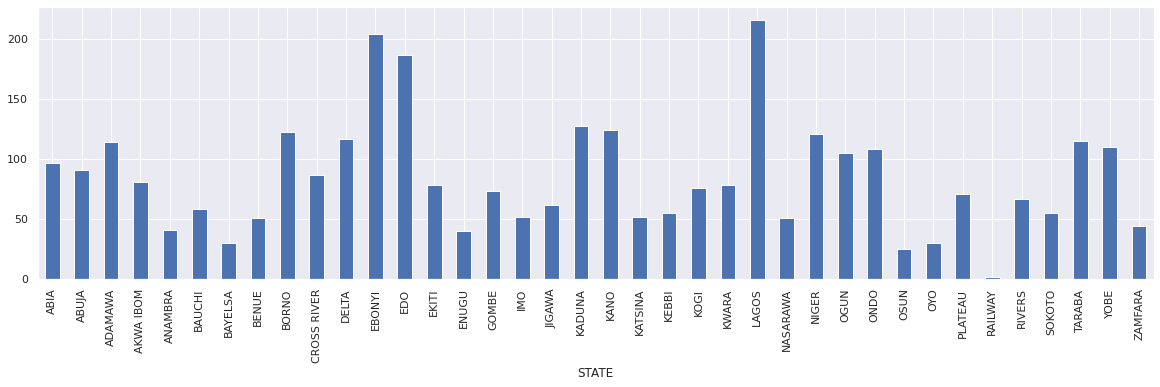

In [10]:
plt.figure(figsize=(20,5))
df_crime.groupby('STATE')['MURDER'].max().plot(kind='bar')

## **Observations**:

* Highest Murder Rate : Lagos and Ebonyi
* Lowest Murder Rate : Railway, Osun, oyo and Bayelsa.

## 2) Assault Rate

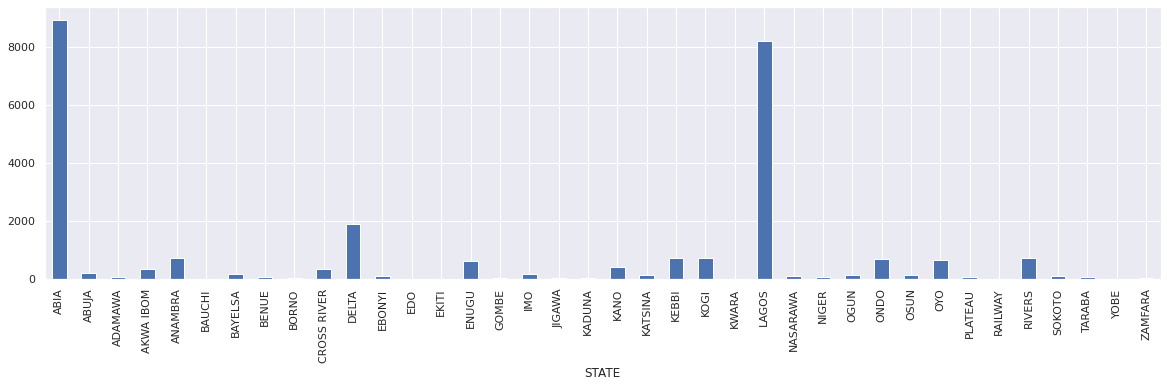

In [11]:
plt.figure(figsize=(20,5))
df_crime.groupby('STATE')['ASSAULT'].max().plot(kind='bar')

## **Observations**:

* Highest Assualt Rate : ABIA and LAGOS.
* Lowest Assualt Rate : RAILWAY, YOBE, ZAMFARA, BORNO, BAUCHI, EDO, KADUNA, JIGAWA, EKITI and GOMBE.

## 3) Rape & Incident assault Rate

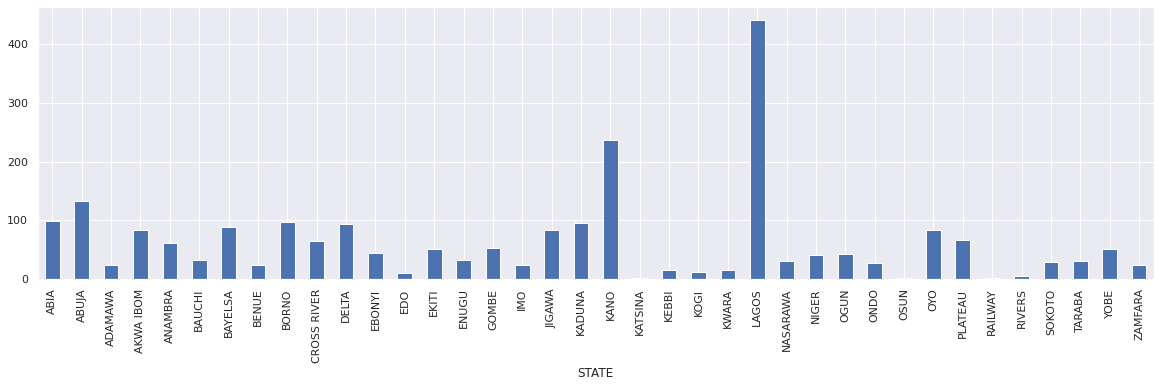

In [12]:
plt.figure(figsize=(20,5))
df_crime.groupby('STATE')['RAPE & INDICENT ASSAULT'].max().plot(kind='bar')

## Observations:

* Highest Rape and Insident assault Rate : LAGOS and KANO.
* Lowest Rape and incident assault Rate  : KASTINA, OSUN, RAILWAY, RIVERS

## 4) Offence against a person

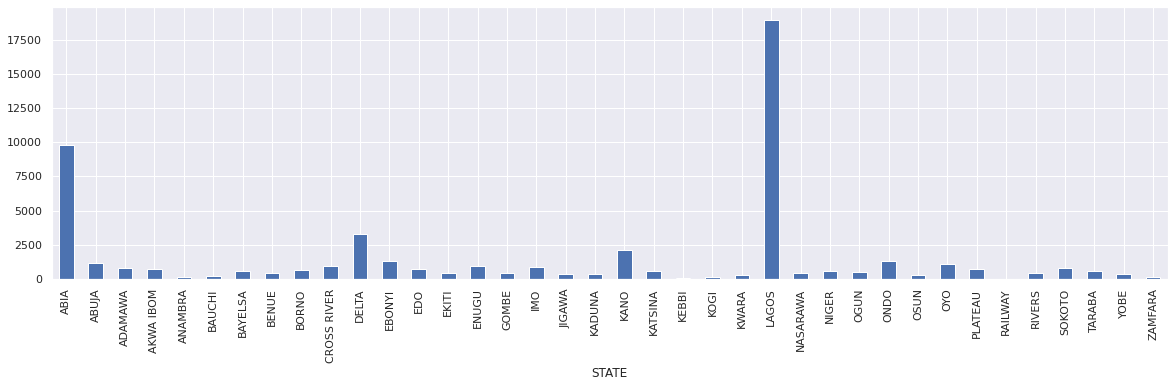

In [13]:
plt.figure(figsize=(20,5))
df_crime.groupby('STATE')['OFFENCES AGAINST PERSONS'].max().plot(kind='bar')

Text(0, 0.5, 'Murder Rate')

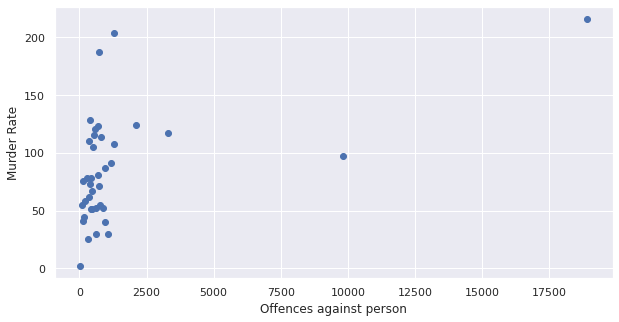

In [14]:
plt.figure(figsize=(10,5))
plt.scatter('OFFENCES AGAINST PERSONS','MURDER',data=df_crime)
plt.xlabel('Offences against person')
plt.ylabel('Murder Rate')

Text(0, 0.5, 'Rape Rate')

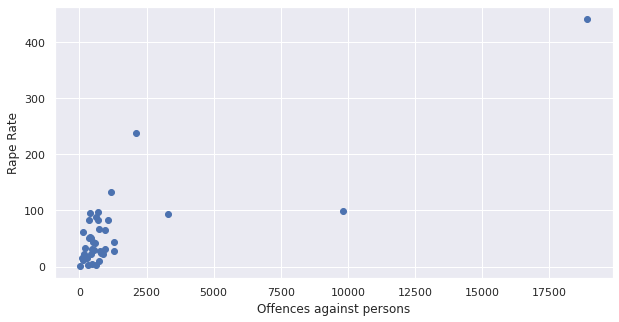

In [15]:
plt.figure(figsize=(10,5))
plt.scatter('OFFENCES AGAINST PERSONS','RAPE & INDICENT ASSAULT',data=df_crime)
plt.xlabel('Offences against persons')
plt.ylabel('Rape Rate')

Text(0, 0.5, 'Assault Rate')

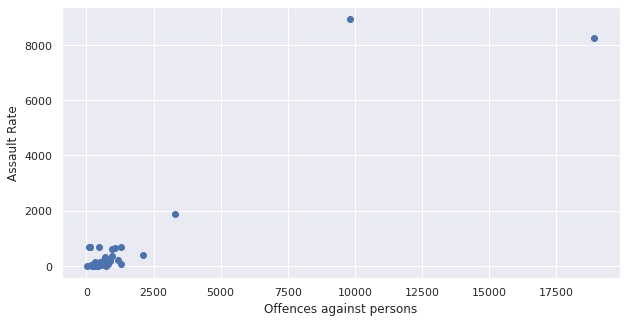

In [16]:
plt.figure(figsize=(10,5))
plt.scatter('OFFENCES AGAINST PERSONS','ASSAULT',data=df_crime)
plt.xlabel('Offences against persons')
plt.ylabel('Assault Rate')

In [17]:
data = df_crime.iloc[:,1:].values

In [18]:
scaled_data = scaler.fit_transform(data)

## Types of Linkages:

## 1) Single Leakage:

The distance between 2 clusters is defined as the shortest distance between points in the two clusters

Text(0, 0.5, 'Euclidean distances')

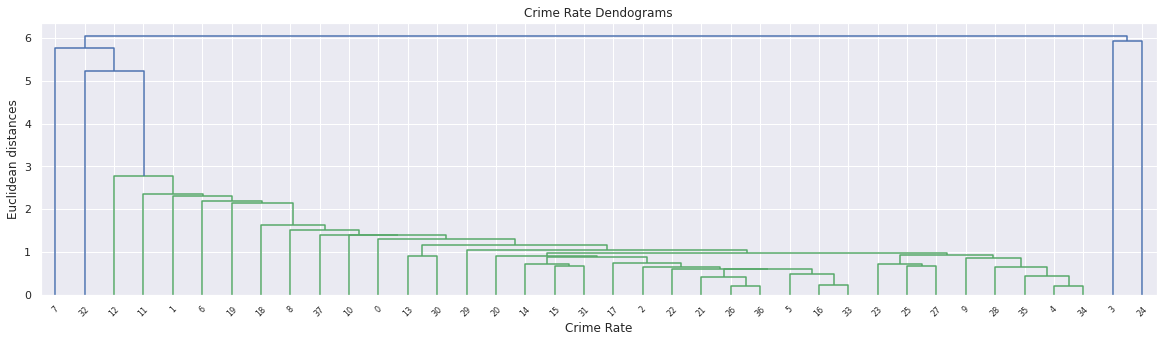

In [19]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='single'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

#### The hierarchy class has a dendrogram method which takes the value returned by the linkage method of the same class. The linkage method takes the dataset and the method to minimize distances as parameters.

## 2) Complete Linkage:

The distance between 2 clusters is defined as the maximum distance between any 2 points in the clusters

Text(0, 0.5, 'Euclidean distances')

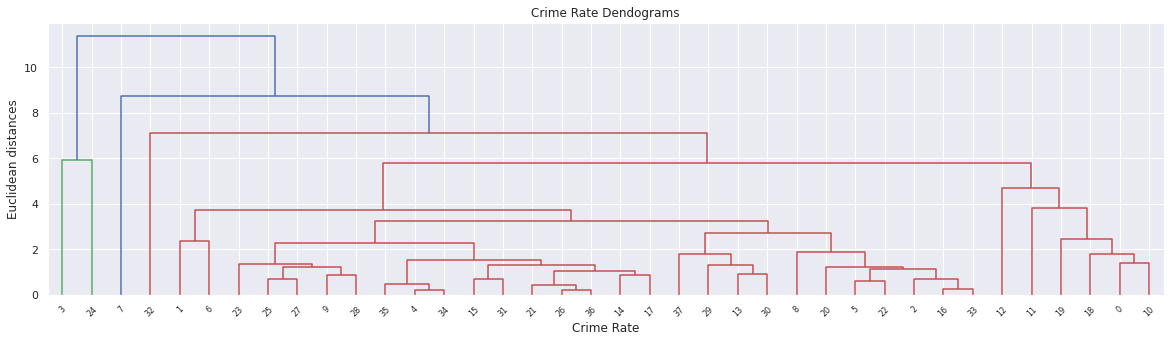

In [20]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='complete'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

## 3) Average Linkage: 
    
The distance between 2 clusters is defined as the average distance between every point of one cluster to every other point of the other cluster.

Text(0, 0.5, 'Euclidean distances')

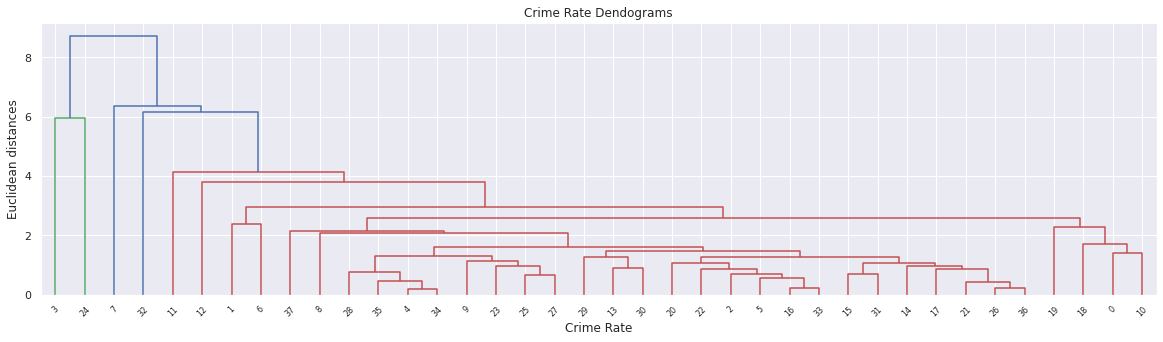

In [21]:
plt.figure(figsize=(20,5))
plt.title("Crime Rate Dendograms")
dend = sch.dendrogram(sch.linkage(scaled_data, method='average'))
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')

#### The single linkage type will produce dendrograms which are not structured properly, whereas complete or average linkage will produce clusters which have a proper tree-like structure.

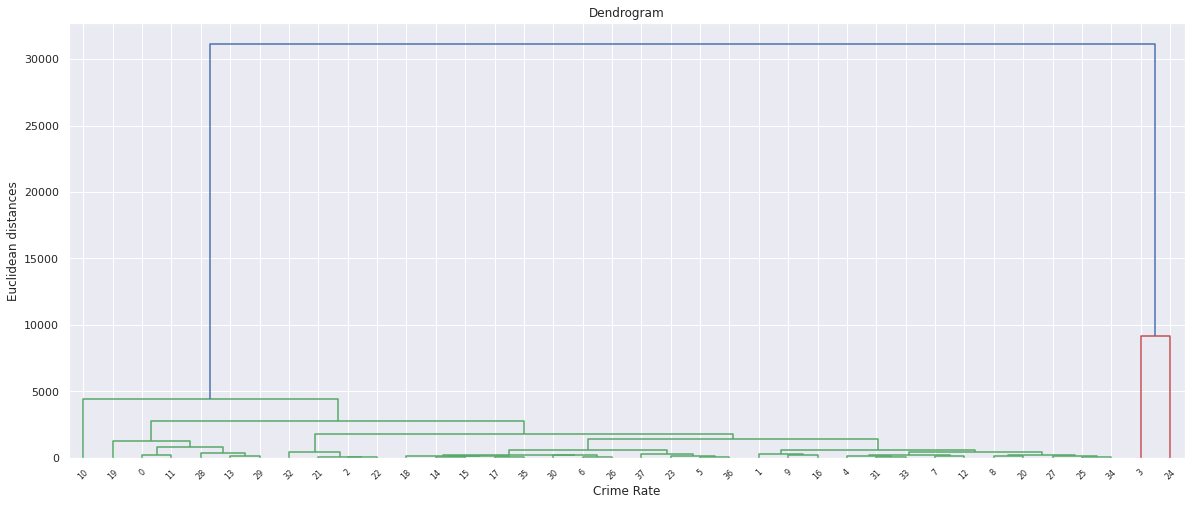

In [22]:
# With Ward method
plt.figure(figsize=(20,8))
dendrogram = sch.dendrogram(sch.linkage(data, method  = "ward"))
plt.title('Dendrogram')
plt.xlabel('Crime Rate')
plt.ylabel('Euclidean distances')
plt.show()

## How do we determine the optimal number of clusters from this diagram? 

We look for the largest distance that we can vertically without crossing any horizontal line and this one is the red framed line on the above diagram. Let’s count the number of lines on the diagram and determine the optimal number of clusters. Cluster number will be 3 for this dataset.

In [23]:
# Fit the Agglomerative Clustering
 
AC = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage ='ward')

**Ward** method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

In [24]:
# Fit and predict to have the cluster labels.
y_pred =AC.fit_predict(data)
y_pred

array([0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [25]:
# Fetch the cluster labels
df_crime['cluster labels']= y_pred

In [26]:
# Let's see which State falls in which cluster
df_crime[['STATE','cluster labels']]

,STATE,cluster labels
0,ABUJA,0
1,AKWA IBOM,0
2,ANAMBRA,0
3,ABIA,2
4,ADAMAWA,0
5,BAUCHI,0
6,BENUE,0
7,BORNO,0
8,BAYELSA,0
9,CROSS RIVER,0


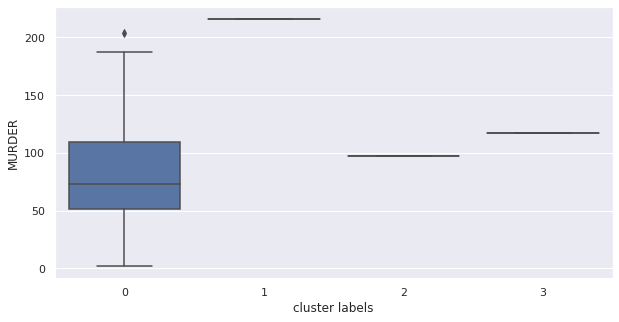

In [27]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='MURDER', data=df_crime)

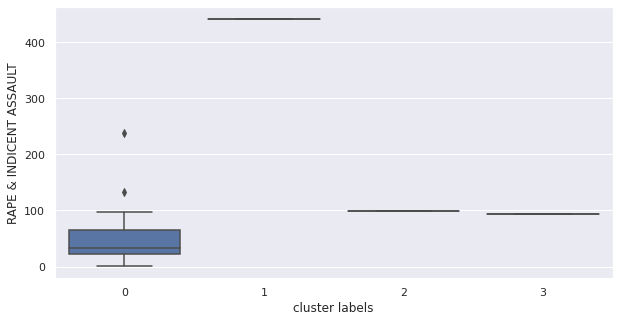

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='RAPE & INDICENT ASSAULT', data=df_crime)

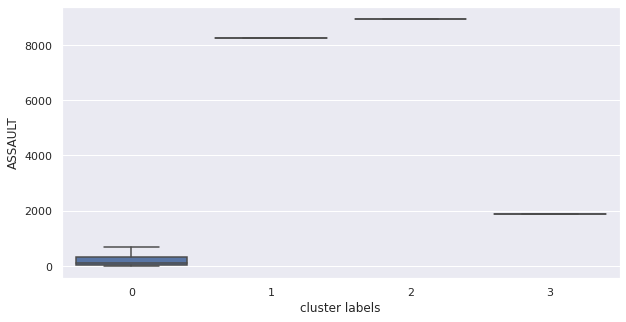

In [29]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='ASSAULT', data=df_crime)

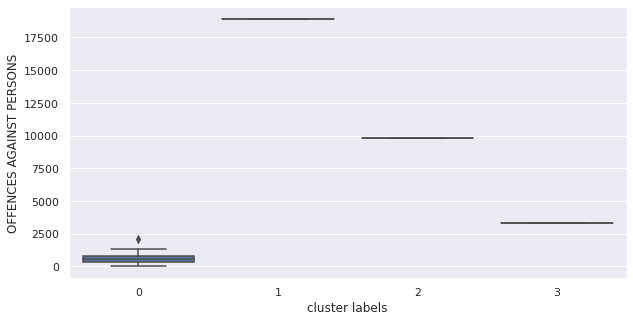

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='cluster labels', y='OFFENCES AGAINST PERSONS', data=df_crime)

## **Observations**:

* The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
* The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.
* The Cities in Cluster-3 seems to have moderate crime rates when compared to other zones and can be called as Moderate-Zone
* The Cities in Cluster-2 seems to have little crime rates when compared to other zones and can be called as Fair-Zone


In [31]:
Safe_Zone= df_crime.groupby('cluster labels')['STATE'].unique()[0]
Safe_Zone

array(['ABUJA', 'AKWA IBOM', 'ANAMBRA', 'ADAMAWA', 'BAUCHI', 'BENUE',
       'BORNO', 'BAYELSA', 'CROSS RIVER', 'EBONYI', 'EDO', 'ENUGU',
       'GOMBE', 'EKITI', 'IMO', 'JIGAWA', 'KADUNA', 'KANO', 'KATSINA',
       'KEBBI', 'KOGI', 'KWARA', 'NIGER', 'NASARAWA', 'OGUN', 'ONDO',
       'OYO', 'OSUN', 'PLATEAU', 'RIVERS', 'SOKOTO', 'TARABA', 'YOBE',
       'ZAMFARA', 'RAILWAY'], dtype=object)

In [32]:
Danger_Zone= df_crime.groupby('cluster labels')['STATE'].unique()[1]
Danger_Zone

array(['LAGOS'], dtype=object)

In [33]:
Moderate_Zone= df_crime.groupby('cluster labels')['STATE'].unique()[2]
Moderate_Zone

array(['ABIA'], dtype=object)

In [34]:
Fair_Zone= df_crime.groupby('cluster labels')['STATE'].unique()[3]
Fair_Zone

array(['DELTA'], dtype=object)

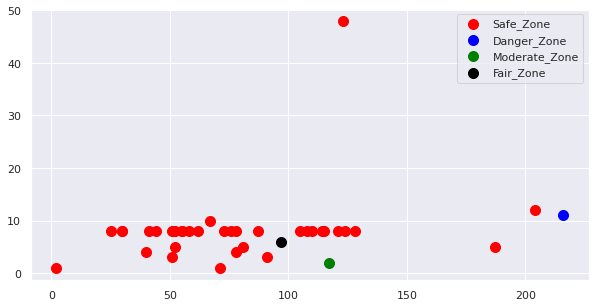

In [35]:
plt.figure(figsize=(10,5))
plt.scatter(data[y_pred==0, 0], data[y_pred==0, 1], s=100, c='red', label ='Safe_Zone')
plt.scatter(data[y_pred==1, 0], data[y_pred==1, 1], s=100, c='blue', label ='Danger_Zone')
plt.scatter(data[y_pred==3, 0], data[y_pred==3, 1], s=100, c='green', label ='Moderate_Zone')
plt.scatter(data[y_pred==2, 0], data[y_pred==2, 1], s=100, c='black', label ='Fair_Zone')
plt.legend()
plt.show()

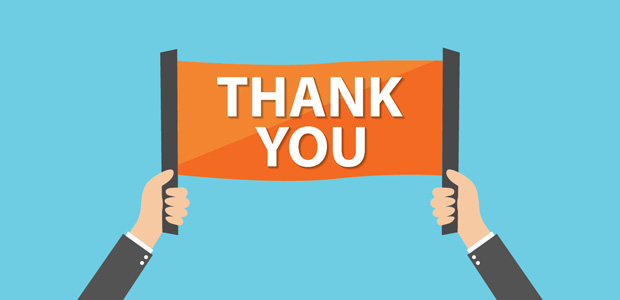